<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/Lecture15_Feature_Selection/Feature_Selection_LogReg_Lab_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the "breast cancer" dataset from sklearn.datasets and determine minimum number features to achieve classification with %96 accuracy.

In [ ]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

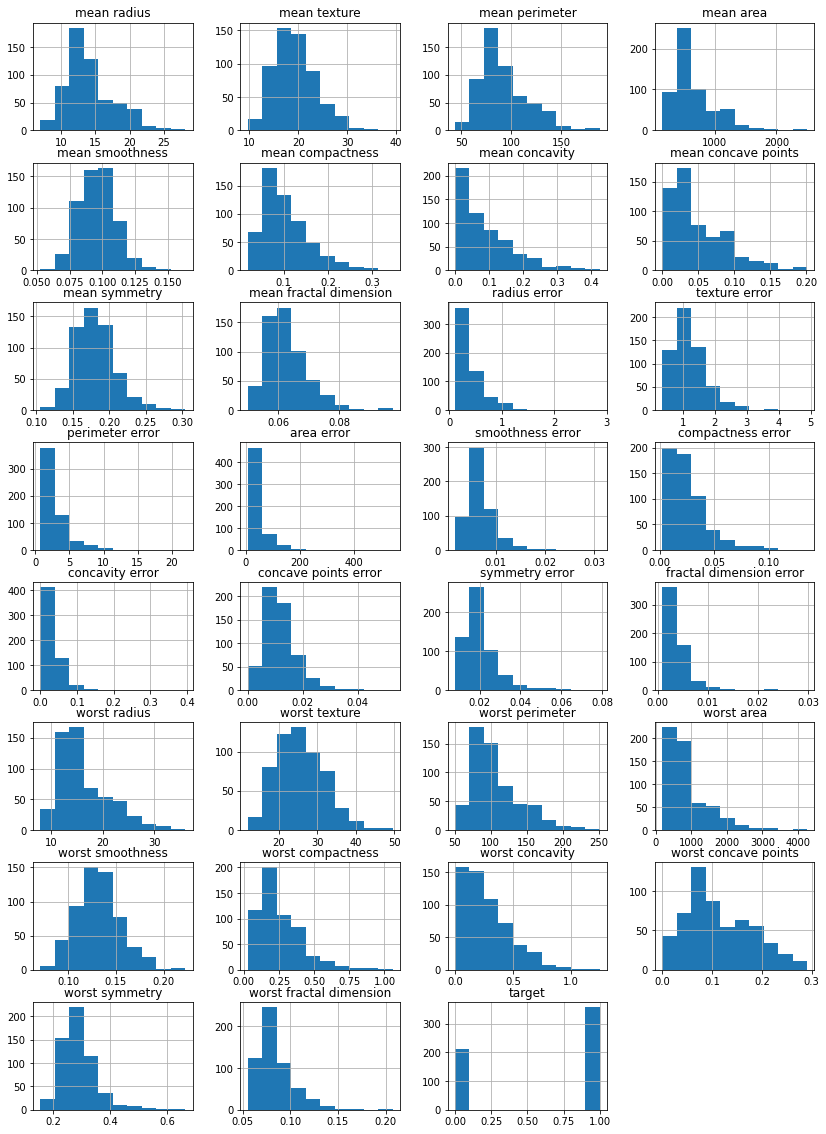

In [ ]:
df.hist(layout=(8,4),figsize=(14,20))
plt.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#MODEL ACCURACY
logreg.score(X_test,y_test)

0.9649122807017544

In [ ]:
yhat=logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
CM=confusion_matrix(y_test,yhat,labels=[0,1])
print(CM)

[[40  3]
 [ 1 70]]


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

print("Feature data dimension: ", x.shape)

select = SelectKBest(score_func=chi2, k=20)
z = select.fit_transform(x, y)
print("After selecting best k features:", z.shape)

Feature data dimension:  (569, 30)
After selecting best k features: (569, 20)


In [ ]:
filter = select.get_support()
features = np.array(x.columns.tolist())
 
print("Selected best features:")
print(features[filter])

Selected best features:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean compactness' 'mean concavity' 'mean concave points' 'radius error'
 'perimeter error' 'area error' 'compactness error' 'concavity error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst compactness' 'worst concavity' 'worst concave points'
 'worst symmetry']


In [ ]:
x_filtered = x.iloc[:,filter]
X_train, X_test, y_train, y_test = train_test_split(x_filtered.values, y.values, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9649122807017544

In [ ]:
yhat=logreg.predict(X_test)
CM=confusion_matrix(y_test,yhat,labels=[0,1])
print(CM)

[[40  3]
 [ 1 70]]


In [ ]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.038324
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  455
Model:                          Logit   Df Residuals:                      435
Method:                           MLE   Df Model:                           19
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.9419
Time:                        18:55:25   Log-Likelihood:                -17.438
converged:                       True   LL-Null:                       -300.17
Covariance Type:            nonrobust   LLR p-value:                9.654e-108
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            13.7409     21.703      0.633      0.527     -28.796      56.278
x2            -0.7803      0.567     -1.377      0.169      -1.891       0.330
x3            -0.5251      2.839     -0.185      0.853      -6.090       5.040
x4            -0.0818      0.104     -0.789      0.430      -0.285       0.121
x5           223.9788    112.184      1.997      0.046       4.102     443.856
x6            44.5964    109.310      0.408      0.683    -169.647     258.839
x7          -505.8769    250.328     -2.021      0.043    -996.511     -15.242
x8             6.5039     35.211      0.185      0.853     -62.509      75.517
x9             2.6304      4.050      0.650      0.516      -5.307      10.567
x10           -0.4886      0.374     -1.307      0.191      -1.222       0.244
x11          -68.5643    172.929     -0.396      0.692    -407.499     270.370
x12          143.4951    149.410      0.960      0.337    -149.343     436.333
x13           -4.2812     10.805     -0.396      0.692     -25.459      16.896
x14           -0.1442      0.262     -0.550      0.583      -0.658       0.370
x15            0.0566      0.641      0.088      0.930      -1.200       1.313
x16            0.0133      0.087      0.153      0.878      -0.157       0.184
x17            2.1300     26.214      0.081      0.935     -49.248      53.508
x18          -51.8320     33.891     -1.529      0.126    -118.258      14.594
x19          -13.9351     60.205     -0.231      0.817    -131.935     104.065
x20          -27.4629     16.408     -1.674      0.094     -59.623       4.697
==============================================================================

Possibly complete quasi-separation: A fraction 0.81 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
coefs = pd.DataFrame({
    'coef': results.params,
    'pvalue': results.pvalues,
}).sort_values(by='pvalue', ascending=False)
coefs

,coef,pvalue
16,2.129969,0.935240
14,0.056577,0.929655
15,0.013348,0.878059
7,6.503859,0.853457
2,-0.525097,0.853274
18,-13.935102,0.816958
12,-4.281217,0.691942
10,-68.564290,0.691745
5,44.596386,0.683287
13,-0.144175,0.582574


(array([2., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 2., 0., 0., 0., 0., 0., 0., 1., 0., 2., 1., 0., 0., 2.]),
 array([0.04329492, 0.06113382, 0.07897273, 0.09681164, 0.11465055,
        0.13248946, 0.15032837, 0.16816728, 0.18600619, 0.2038451 ,
        0.221684  , 0.23952291, 0.25736182, 0.27520073, 0.29303964,
        0.31087855, 0.32871746, 0.34655637, 0.36439527, 0.38223418,
        0.40007309, 0.417912  , 0.43575091, 0.45358982, 0.47142873,
        0.48926764, 0.50710655, 0.52494545, 0.54278436, 0.56062327,
        0.57846218, 0.59630109, 0.61414   , 0.63197891, 0.64981782,
        0.66765672, 0.68549563, 0.70333454, 0.72117345, 0.73901236,
        0.75685127, 0.77469018, 0.79252909, 0.81036799, 0.8282069 ,
        0.84604581, 0.86388472, 0.88172363, 0.89956254, 0.91740145,
        0.93524036]),
 <a list of 50 Patch objects>)

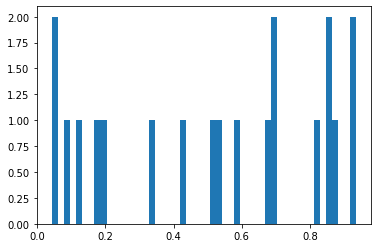

In [ ]:
plt.hist(coefs.pvalue,bins=50)

In [ ]:
feature_cols = coefs[coefs.pvalue < 0.2].index
print(len(feature_cols))

6


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train[:,feature_cols], y_train)
logreg.score(X_test[:,feature_cols],y_test)

0.9649122807017544

In [ ]:
yhat=logreg.predict(X_test[:,feature_cols])
CM=confusion_matrix(y_test,yhat,labels=[0,1])
print(CM)

[[40  3]
 [ 1 70]]
